In [4]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
text = "Model-based RL don't need a value function for the policy"
print(tokenizer.tokenize(text))

['Model-based', 'RL', 'do', "n't", 'need', 'a', 'value', 'function', 'for', 'the', 'policy']


In [5]:
from nltk.tokenize import word_tokenize
print(word_tokenize(text))

['Model-based', 'RL', 'do', "n't", 'need', 'a', 'value', 'function', 'for', 'the', 'policy']


<font color=yellow>#대표적인 어간 추출(stemming) 기법인 Porter 및 Lancaster 추출 패키지를 불러오고 활용해봄 / Lemmatizer는 표제어 추출</font>

In [6]:
from nltk.stem import PorterStemmer, LancasterStemmer
stem1 = PorterStemmer()
stem2 = LancasterStemmer()
words = ["eat","ate","eaten","eating"]
print("Porter Stemmer       :", [stem1.stem(w) for w  in words])
print("Lancaster Stemmer    :", [stem2.stem(v) for v  in words])

Porter Stemmer       : ['eat', 'ate', 'eaten', 'eat']
Lancaster Stemmer    : ['eat', 'at', 'eat', 'eat']


In [7]:
from nltk import WordNetLemmatizer
lemm = WordNetLemmatizer()
words = ["eat","ate","eaten","eating"]
print("WordNet Lemmatizer:",[lemm.lemmatize(v,pos="v") for v in words])

WordNet Lemmatizer: ['eat', 'eat', 'eat', 'eat']


<font color=yellow>#불용어 제거</font>

In [8]:
from nltk.corpus import stopwords
print(stopwords.words('english')[:5])

['i', 'me', 'my', 'myself', 'we']


In [9]:
input_sentence = "We should all study hard for the exam."
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(input_sentence)
result = []
for w in word_tokens:
    if w not in stop_words:
        result.append(w)
print(word_tokens)
print(result)

['We', 'should', 'all', 'study', 'hard', 'for', 'the', 'exam', '.']
['We', 'study', 'hard', 'exam', '.']


<font color=yellow>#정수 인코딩 및 Sorting</font>

In [10]:
mylist = ['English', 'Math', 'Science']
for n, name in enumerate(mylist):
    print("Course : {}, Number : {}".format(name, n))

Course : English, Number : 0
Course : Math, Number : 1
Course : Science, Number : 2


In [11]:
vocab = {'apple': 2, 'July': 6, 'piano': 4, 'cup': 8, 'orange': 1}
vocab_sort = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
print(vocab_sort)
word2inx = {word[0] : index + 1 for index, word in enumerate(vocab_sort)}
print(word2inx)

[('cup', 8), ('July', 6), ('piano', 4), ('apple', 2), ('orange', 1)]
{'cup': 1, 'July': 2, 'piano': 3, 'apple': 4, 'orange': 5}


In [12]:
tokenizer = TreebankWordTokenizer()
text = "Model-based RL don't need a value function for the policy" \
       "but some of of Model-based RL algorithms do have a value function"
token_text = tokenizer.tokenize(text)
word2inx = {}
Bow = []
for word in token_text:
    if word not in word2inx.keys():
        word2inx[word] = len(word2inx)
        Bow.insert(len(word2inx)-1,1)
    else:
        inx = word2inx.get(word)
        Bow[inx] += 1
print(word2inx)
print(Bow)

{'Model-based': 0, 'RL': 1, 'do': 2, "n't": 3, 'need': 4, 'a': 5, 'value': 6, 'function': 7, 'for': 8, 'the': 9, 'policybut': 10, 'some': 11, 'of': 12, 'algorithms': 13, 'have': 14}
[2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1]


<font color=yellow>#유사도 분석</font>     1. 코사인 유사도  2.레반슈타인 거리

In [13]:
import numpy as np
def cos_sim(A, B):
    return np.dot(A, B) / (np.linalg.norm(A)*np.linalg.norm(B))

a = [1,0,0,1]
b = [1,1,1,1]
c = [0,1,1,0]
print(cos_sim(a,b), cos_sim(b,c), cos_sim(c,a))

0.7071067811865475 0.7071067811865475 0.0


In [14]:
def leven(text1, text2):
    len1 = len(text1) + 1
    len2 = len(text2) + 1
    sim_array = np.zeros((len1,len2))
    sim_array[:,0] = np.linspace(0, len1-1, len1)
    sim_array[0,:] = np.linspace(0, len2-1, len2)
    for i in range (1,len1):
        for j in range (1,len2):
            add_char = sim_array[i-1, j] + 1
            sub_char = sim_array[i, j-1] + 1
            if text1[i-1] == text2[j-1]:
                mod_char = sim_array[i-1, j-1]
            else:
                mod_char = sim_array[i-1, j-1] + 1
            sim_array[i, j] = min([add_char, sub_char, mod_char])
    return sim_array[-1, -1]

print(leven('datatmining', 'dtatamining'))


2.0


#Word2Vec</font> CBoW & SkipGram

In [15]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
data = pd.read_csv('transcripts.csv')
print('Missing Values: ', data.isnull().sum())
data = data.dropna().reset_index(drop=True)
merge_data = ' '.join(str(data.iloc[i,0]) for i in range(100))
print('Total word count: ', len(merge_data))
print(merge_data[:40])

Missing Values:  transcript    0
url           0
dtype: int64
Total word count:  1511916
Good morning. How are you?(Laughter)It's


In [16]:
tokenizer = RegexpTokenizer("[\\w]+")
token_text = tokenizer.tokenize(merge_data)

stop_words2 = set(stopwords.words('english'))
token_stop_text = []
for w in token_text:
    if w not in stop_words2:
        token_stop_text.append(w)
print('After cleaning :', len(token_stop_text))
print(token_stop_text[:10])


After cleaning : 147300
['Good', 'morning', 'How', 'Laughter', 'It', 'great', 'I', 'blown', 'away', 'whole']


In [ ]:
word2inx = {}
Bow = []
for word in token_stop_text:
    if word not in word2inx.keys():
        word2inx[word] = len(word2inx)
        Bow.insert(len(word2inx)-1, 1)
    else:
        inx = word2inx.get(word)
        Bow[inx] += 1
print('Unique Words Count :', len(Bow))

Unique Words Count : 16689


Downgrade numpy due to gensim

In [18]:
import numpy as np
token_stop_text = np.reshape(np.array(token_stop_text),[-1,1])
from gensim.models import Word2Vec
model = Word2Vec(vector_size = 100, window = 5, min_count = 2, sg = 0)
model.build_vocab(token_stop_text)
model.train(token_stop_text, total_examples = model.corpus_count, epochs = 30, report_delay = 1)
#print(model.wv.most_similar(positive = ["hard"]))
vocabs = model.wv.key_to_index.keys()
word_vec_list = [model.wv[i] for i in vocabs]

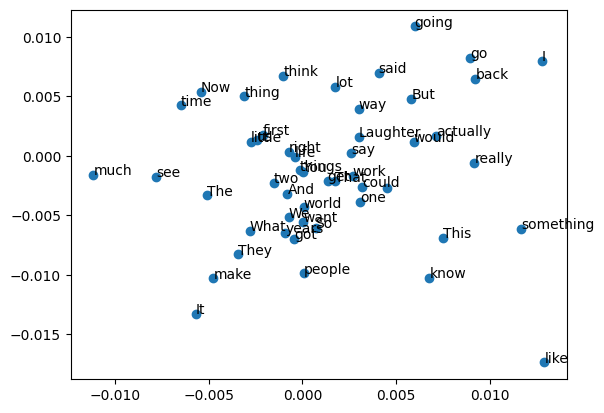

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pcafit = pca.fit_transform(word_vec_list)
x = pcafit[0:50,0]
y = pcafit[0:50,1]
import matplotlib.pyplot as plt
plt.scatter(x,y, marker = 'o')
for i, v in enumerate(vocabs):
    if i < 49:
        plt.annotate(v,xy = (x[i],y[i]))
plt.show()

#SGNS: SkipGram with Negative Sampling

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(token_stop_text)
word2inx = tokenizer.word_index
encoded = tokenizer.texts_to_sequences(token_stop_text)
encoded = np.array(encoded).T
from tensorflow.keras.preprocessing.sequence import skipgrams
skip_gram = [skipgrams(sample, vocabulary_size = len(word2inx)+1, window_size =10) for sample in encoded]

NameError: name 'token_stop_text' is not defined